In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
from sklearn.datasets import load_iris

iris = load_iris()
dataset = pd.DataFrame(data=iris.data,columns=iris.feature_names)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


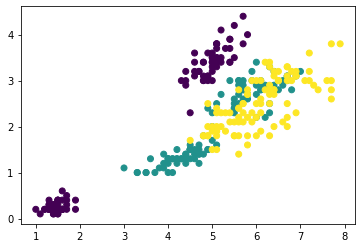

In [139]:
plt.scatter(dataset["sepal length (cm)"],dataset["sepal width (cm)"],c=iris.target,cmap='viridis')
plt.scatter(dataset["petal length (cm)"],dataset["petal width (cm)"],c=iris.target,cmap='viridis')

In [140]:
dataset.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [141]:
dataset.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [142]:
dataset.drop(["sepal length (cm)","petal length (cm)"],axis=1,inplace=True)
dataset

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
...,...,...
145,3.0,2.3
146,2.5,1.9
147,3.0,2.0
148,3.4,2.3


In [143]:
dataset.var()

sepal width (cm)    0.189979
petal width (cm)    0.581006
dtype: float64

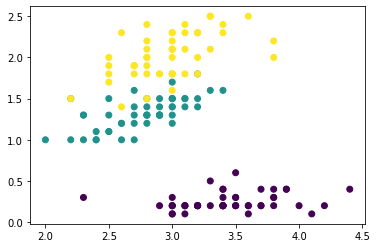

In [144]:
plt.scatter(dataset["sepal width (cm)"],dataset["petal width (cm)"], c=iris.target, cmap='viridis')

In [145]:
target_class = iris.target
target_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [146]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(dataset,target_class,test_size=0.3)
print(x_train.shape)

(105, 2)


In [147]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb = GaussianNB()
nb.fit(x_train,y_train)
predict = nb.predict(x_test)

# Antes 91%
print("Naive Bayes")
print(classification_report(y_test,predict))

Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [148]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2,weights='distance')
knn.fit(x_train,y_train)
predict = knn.predict(x_test)

#antes 96%
print("KNN")
print(classification_report(y_test,predict))

KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        14
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        14
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



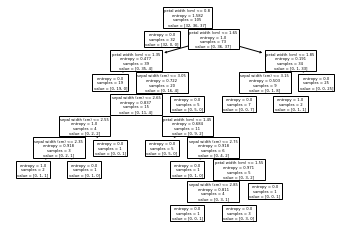

In [149]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(x_train,y_train)
predict = decision_tree.predict(x_test)

#antes 87%
print("Decision Tree")
print(classification_report(y_test,predict))
plot_tree(decision_tree,feature_names=dataset.columns.tolist())
plt.show()

In [150]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(x_train,y_train)
predict = rfc.predict(x_test)

# antes 91%

print("Random Forest")
print(classification_report(y_test,predict))

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        14
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [151]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(x_train,y_train)
predict = svm.predict(x_test)

#antes 96%
print("SVM")
print(classification_report(y_test,predict))

SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

